**CONVONUTIONAL NEURAL NETWORK(CNN)**

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 721.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 149.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 139.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models

In [ ]:
(x_train,_), (x_test,_) = tf.keras.datasets.mnist.load_data()
x_train= x_train/255
x_test= x_test/255

#expand_dims(axis=1) adding axis at the starting
#expand_dims(axis=-1) adding axis at the back
x_train=np.expand_dims(x_train,axis=-1)
x_test=np.expand_dims(x_test,axis=-1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


Performing Encoding and Decoding

In [ ]:
encoder= models.Sequential([layers.InputLayer(input_shape=(28,28,1)),
                            layers.Conv2D(32, (3,3), activation='relu', strides=2, padding='same'),# Random 32 filters
                            layers.Conv2D(64, (3,3), activation="relu", strides=2, padding='same'),
                            layers.Flatten(),
                            layers.Dense(64, activation='relu')])
# convolutional layers are used for desampling to decrease the number of dimensions we use Conv2D
# opposite to increase the number of dimensions or upsampling we use Conv2DTranspose
decoder= models.Sequential([layers.InputLayer(input_shape=(64,)),
                            layers.Dense(7*7*64, activation='relu'),
                            layers.Reshape((7,7,64)),
                            layers.Conv2DTranspose(64, (3,3), activation='relu', strides=2, padding='same'),
                            layers.Conv2DTranspose(32, (3,3), activation='relu', strides=2, padding='same'),
                            layers.Conv2DTranspose(1, (3,3), activation='sigmoid', padding='same')])
autoencoder= models.Sequential([encoder,decoder])
autoencoder.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_13 (Sequential)      │ (None, 64)             │       219,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_14 (Sequential)      │ (None, 28, 28, 1)      │       259,521 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 479,105 (1.83 MB)

 Trainable params: 479,105 (1.83 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
encoder.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │       200,768 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 219,584 (857.75 KB)

 Trainable params: 219,584 (857.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
decoder.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 3136)           │       203,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 14, 14, 64)     │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 28, 28, 1)      │           289 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259,521 (1013.75 KB)

 Trainable params: 259,521 (1013.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') #compiled the model

In [ ]:
autoencoder.fit(x_train,x_train, epochs=10, batch_size=128, validation_data=(x_test,x_test))
# we are comparing the new image from the original image so we use training data and validation data 2 times
# while training we are finding the correct values for filters
#if my validation loss becoming lesser than it's overfitting and we will stop the training process

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 76ms/step - loss: 0.2636 - val_loss: 0.0899
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0865 - val_loss: 0.0772
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0768 - val_loss: 0.0736
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0740 - val_loss: 0.0720
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0722 - val_loss: 0.0704
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0709 - val_loss: 0.0699
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 0.0702 - val_loss: 0.0694
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0695 - val_loss: 0.0686
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0689 - val_loss: 0.0687
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 75ms/step - loss: 0.0686 - val_loss: 0.0681


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


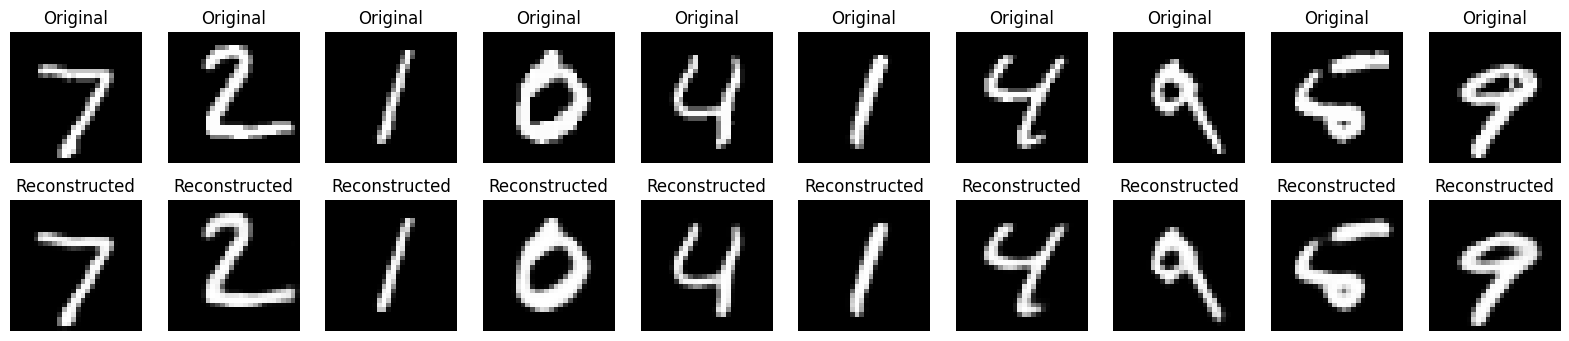

In [ ]:
decoded_images= autoencoder.predict(x_test)
n=10
plt.figure(figsize=(20,4))

for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.title("Original")
  plt.gray()
  ax.axis('off')

  ax=plt.subplot(2, n , i+n+1)
  plt.imshow(decoded_images[i].reshape(28,28), cmap='grey')
  plt.title('Reconstructed')
  plt.gray()
  ax.axis('off')

plt.show()

In [ ]:
autoencoder.save('autoencoder_mnist.keras')